In [1]:
import MCMC
from matplotlib import pyplot as plt
import numpy as np
import affine_invariant as af
from time import time

In [2]:
# plt.style.available

In [3]:
plt.style.use('ggplot') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

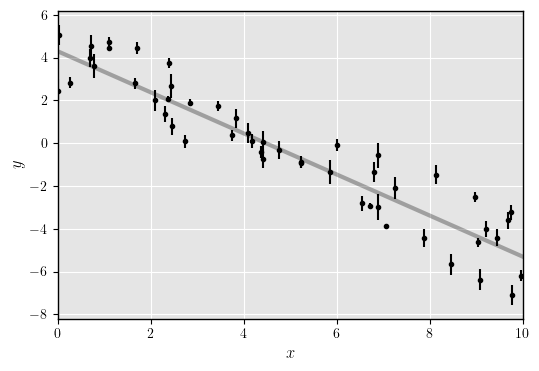

In [4]:
m_true = -0.9594
b_true = 4.294
f_true = 0.423

data = af.generate_data_line(50)
x = data[0]
y = data[1]
yerr = data[2]

# Plot the data
plt.figure(figsize=(6, 4))
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [5]:
ndim = 3
nwalkers = 16

p0 = af.generate_p0_line(nwalkers)
p0

array([[-0.66329934,  4.52875119, -0.80862461],
       [-0.72591168,  4.26039923, -0.87296103],
       [-0.71359538,  4.44921687, -1.07089912],
       [-0.70105533,  4.31037654, -0.77737674],
       [-0.62850862,  4.29798344, -0.8950935 ],
       [-0.79571424,  4.25152233, -0.77283614],
       [-0.80457436,  4.29031498, -0.85227528],
       [-0.80717206,  4.30758026, -0.91315618],
       [-0.82501   ,  4.29180611, -0.88343189],
       [-0.75557716,  4.16715037, -0.90034964],
       [-0.68341629,  4.31844089, -0.88589797],
       [-0.84088281,  4.56997212, -0.82666662],
       [-0.81947042,  4.30118764, -0.89952652],
       [-0.62193445,  4.35992546, -0.73114801],
       [-0.56778376,  4.22645026, -0.74471597],
       [-0.86221074,  4.34212804, -0.87308558]])

In [6]:
p0.shape, data.shape

((16, 3), (3, 50))

In [7]:
af.log_prob_line(p0, data)

array([-122.43611524,  -29.00742728,  -59.62617192,  -46.03890125,
       -174.13468176,  -25.42907133,  -26.06266341,  -26.56265001,
        -34.7343572 ,  -21.87219594,  -66.65724891,  -32.55653581,
        -31.62875627, -190.46984388, -669.02726676,  -56.66999882])

# Affine invariant

In [16]:
t0 = time()
chain = af.mcmc_line(50000, nwalkers, p0, data, verbose=True, batch=3, parallel=True)
# chain = af.mcmc_line(500, nwalkers, p0, data, verbose=True)
t1 = time()
print(f"Time taken: {t1-t0} s")

Time taken: 4.1041154861450195 s
Acceptance rate: 0.5749325


In [24]:
t0 = time()
# chain = af.mcmc_line(500, nwalkers, p0, data, verbose=True, batch=2, parallel=True)
chain = af.mcmc_line(50000, nwalkers, p0, data, verbose=True)
t1 = time()
print(f"Time taken: {t1-t0} s")

Time taken: 6.40064001083374 s
Acceptance rate: 0.65716


In [ ]:
# %%timeit -n 3 -r 5

# chain = MCMC.run_mcmc(1000, 20, parallel=True)

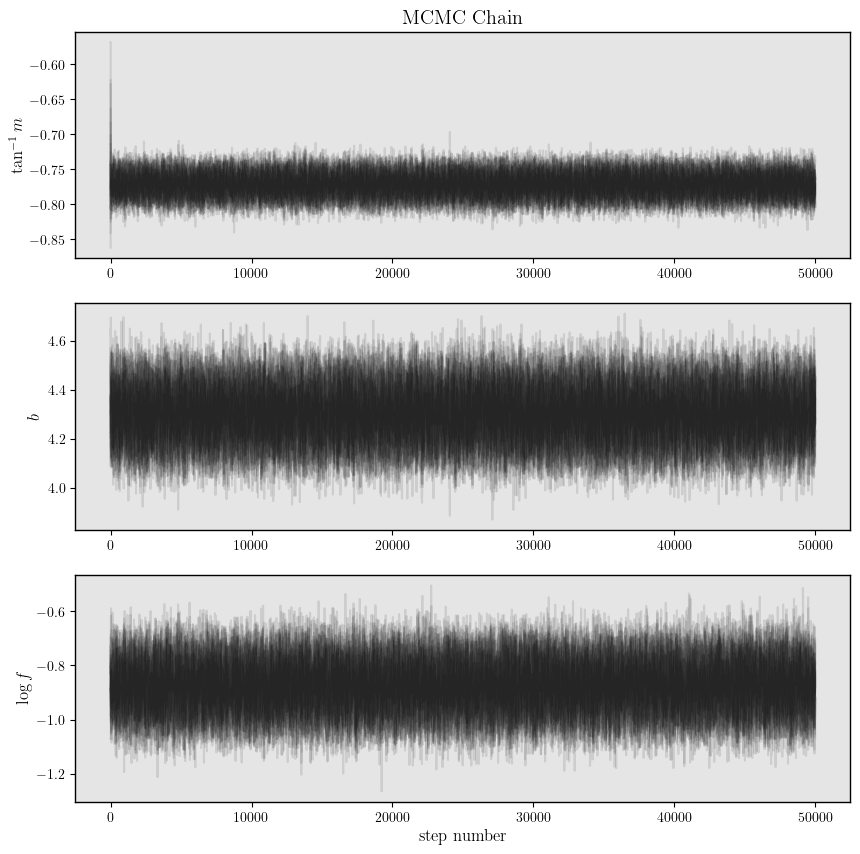

In [25]:
# plot the chain
labels = [r"$\tan^{-1} m$", r"$b$", r"$\log f$"]
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].set_title("MCMC Chain")
for i, label in enumerate(labels):
    ax[i].plot(chain[:, :, i], alpha=0.1, color="k")
    ax[i].set_ylabel(label)
    ax[i].grid(False)
ax[-1].set_xlabel("step number")
plt.show()

In [18]:
p0_next = chain[-1]
t0 = time()
chain = af.mcmc_line(2000, nwalkers, p0_next, data, verbose=True)
t1 = time()
print(f"Time taken: {t1-t0} s")

Time taken: 14.15280795097351 s
Acceptance rate: 0.66078125


In [26]:
chain.shape

(50001, 16, 3)

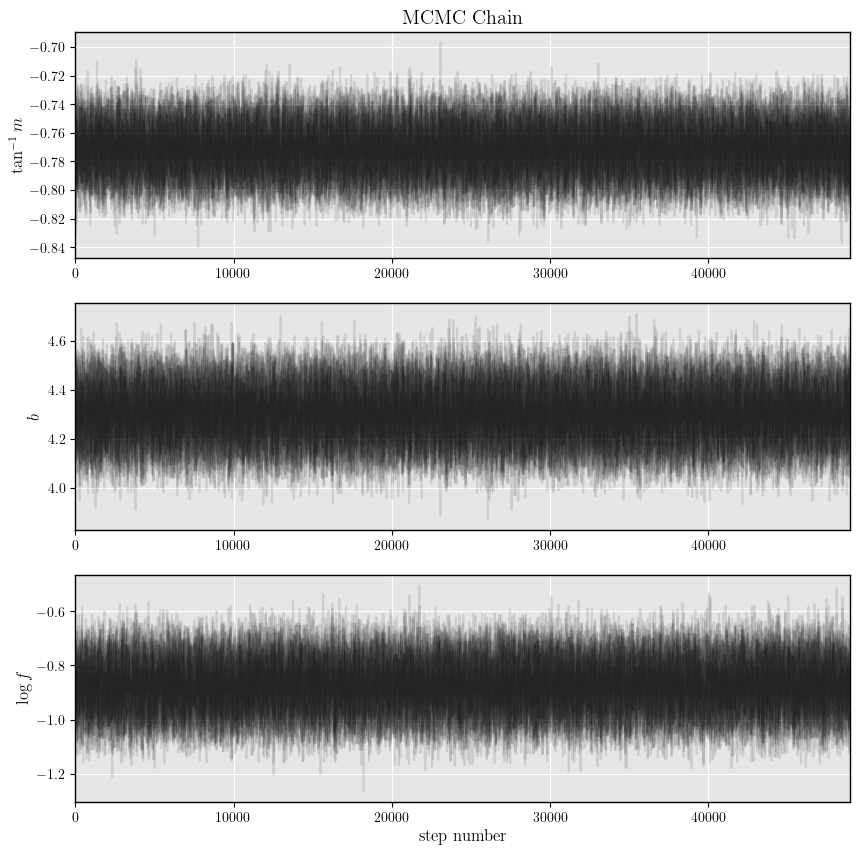

In [27]:
# plot the chain
burn = 1000
labels = [r"$\tan^{-1} m$", r"$b$", r"$\log f$"]
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].set_title("MCMC Chain")
for i, label in enumerate(labels):
    ax[i].plot(chain[burn:, :, i], alpha=0.1, color="k")
    ax[i].set_ylabel(label)
    ax[i].set_xlim(0, len(chain)-burn)
ax[-1].set_xlabel("step number")
plt.show()

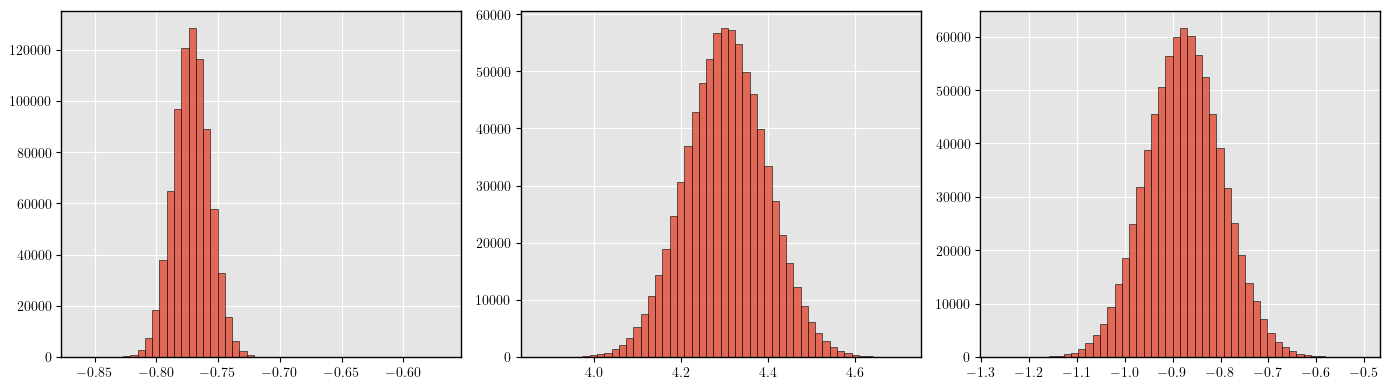

In [28]:
# plot in subplots
flat = chain.reshape((-1, 3)).copy()
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for i in range(3):
    axes[i].hist(flat[:, i], bins=50, histtype="bar", alpha=0.8, ec="k", lw=0.5)
fig.tight_layout()
plt.show()


/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


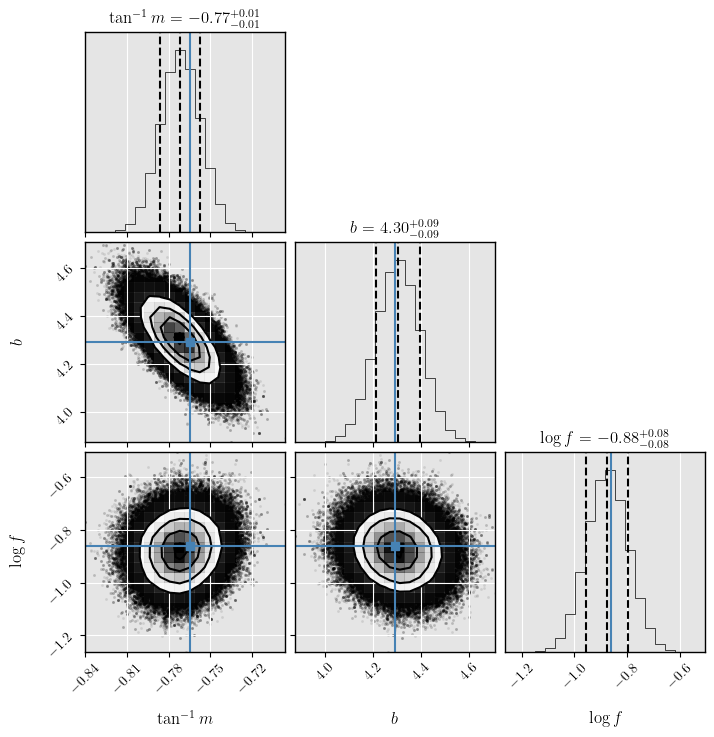

In [29]:
import corner

# plot in corner
burn = 100
flat = chain[burn:].reshape((-1, 3)).copy()

fig = corner.corner(
    flat, 
    labels=labels, 
    truths=[np.arctan(m_true), b_true, np.log(f_true)],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)
plt.show()


# emcee

In [23]:
def log_likelihood(theta, x, y, yerr):
    if len(theta.shape) == 1:
        atan_m, b, log_f = theta
        y_mod = np.tan(atan_m) * x + b
        sigma2 = yerr**2 + y_mod**2 * np.exp(2 * log_f)
        return -0.5 * np.sum((y - y_mod) ** 2 / sigma2 + np.log(sigma2))
    else:
        atan_m, b, log_f = theta[:,0], theta[:,1], theta[:,2]
        N = len(atan_m)
        M = len(x)
        y_mod = np.repeat(np.tan(atan_m), M).reshape(N, M) * np.repeat(x, N).reshape(M, N).T + np.repeat(b, M).reshape(N, M)
        sigma2 = np.repeat(yerr**2, N).reshape(M, N).T + y_mod**2 * np.exp(2 * np.repeat(log_f, M).reshape(N, M))
        return -0.5 * np.sum((y - y_mod) ** 2 / sigma2 + np.log(sigma2), axis=1)

In [24]:
log_likelihood(p0, x, y, yerr), log_likelihood(p0, x, y, yerr).shape

(array([ -124.54873521,   -65.0535688 ,  -150.5096568 ,   -93.41877273,
         -388.28034046,  -123.48186606,   -40.06916293,   -93.13636148,
          -85.24266787,  -101.64081884,  -337.04847958,   -93.41693942,
         -139.02616811, -2165.71233716,  -179.19235718,   -43.01503885]),
 (16,))

In [25]:
from scipy.stats import uniform

def log_prior(theta, locs, scales):
    atan_m, b, log_f = None, None, None
    if len(theta.shape) == 1:
        atan_m, b, log_f = theta
    else:
        atan_m, b, log_f = theta[:,0], theta[:,1], theta[:,2]

    prob_m = uniform.pdf(atan_m, loc=locs[0], scale=scales[0])
    prob_b = uniform.pdf(b, loc=locs[1], scale=scales[1])
    prob_f = uniform.pdf(log_f, loc=locs[2], scale=scales[2])
    return prob_m+prob_b+prob_f 

In [26]:
log_prior(p0, locs, scales), log_prior(p0, locs, scales).shape

(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 (16,))

In [27]:
def log_probability(theta, x, y, yerr):
    log_prior_ = log_prior(theta, locs, scales)
    return np.select([np.isinf(log_prior_)], [-np.inf], default=log_prior_+log_likelihood(theta, x, y, yerr))
    

In [28]:
log_probability(p0, x, y, yerr), log_probability(p0, x, y, yerr).shape

(array([ -122.54873521,   -63.0535688 ,  -148.5096568 ,   -91.41877273,
         -386.28034046,  -121.48186606,   -38.06916293,   -91.13636148,
          -83.24266787,   -99.64081884,  -335.04847958,   -91.41693942,
         -137.02616811, -2163.71233716,  -177.19235718,   -41.01503885]),
 (16,))

In [30]:
from multiprocessing import Pool
import os
import emcee
os.environ["OMP_NUM_THREADS"] = "8"

In [31]:
# %%timeit

t0 = time()
with Pool() as pool:
    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability, args=(x, y, yerr), pool=pool
    )
    sampler.run_mcmc(p0, 5000, progress=True)
t1 = time()
print(f"Time taken: {t1-t0} s")

100%|██████████| 5000/5000 [00:35<00:00, 140.47it/s]

Time taken: 35.85115623474121 s


In [32]:
flat_samples = sampler.get_chain(discard=500, flat=True)
print(flat_samples.shape)

(72000, 3)


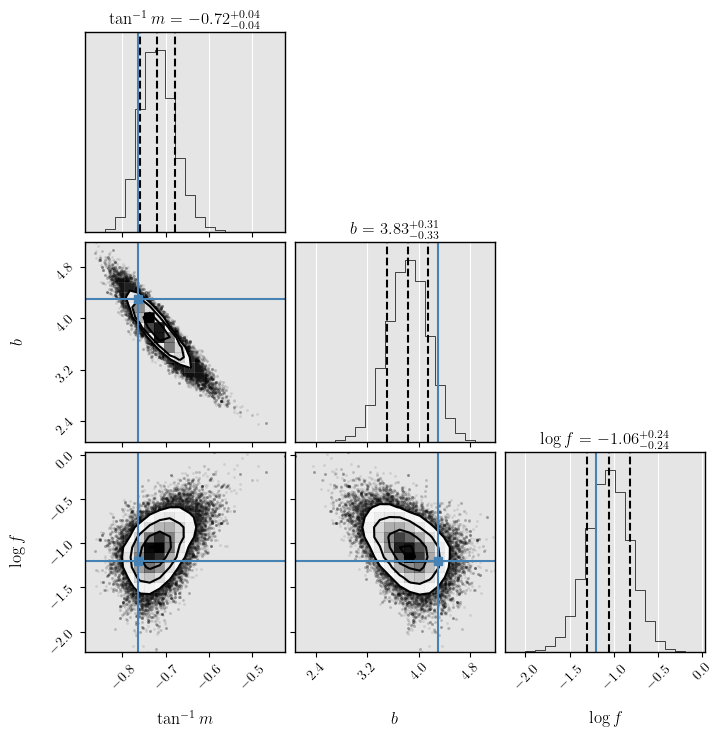

In [33]:
corner.corner(
    flat_samples, 
    labels=labels, 
    truths=[np.arctan(m_true), b_true, np.log(f_true)], 
    quantiles=[0.16, 0.5, 0.84], 
    title_kwargs={"fontsize": 12},
    show_titles=True
)
plt.show()

In [34]:
35.85115623474121/0.3783838748931885

94.74810797595802